# Dog Adoption Data Analysis

This project was motivated by my love for dog and my passion to improve the dog adoption process. The data used in here was obtained from [Kaggle site](https://www.kaggle.com/datasets/whenamancodes/dog-adoption).

1. Information about the data: This dataset of adoptable dogs in the US was collected to better understand how animals are relocated from state to state and imported from outside the US. The data includes information on over 3,000 dogs that were described as having originated in places different from where they were listed for adoption. The findings were published in a visual essay on The Pudding entitled Finding Forever Homes published in October 2019. This dataset is a snapshot of data collected on a single day and does not include all adoptable dogs in the US. However, it provides valuable insights into the whereabouts of these animals and the journey they take to find their forever homes [Source: Kaggle](https://www.kaggle.com/datasets/whenamancodes/dog-adoption)

2. Goal: This project will gain insights on dog adoption situation in USA and answer the following questions:
- What types and breed of dog are brought into shelters across the USA in a given year?
- Which states have the most imports of dogs and what breeds/types those are? Does it have anything to do with the population in each states?
- Are there any trends in the types/breeds of dogs being brought into shelters?

###Import the required library and the dataset

In [40]:
#Upload data file:
from google.colab import files
uploaded = files.upload()

Saving allDogDescriptions.csv to allDogDescriptions (1).csv
Saving dogTravel.csv to dogTravel (1).csv
Saving movesByLocation.csv to movesByLocation (1).csv
Saving state_symbol.csv to state_symbol (1).csv
Saving StatePopulation2019.csv to StatePopulation2019 (1).csv


In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
alldogs = pd.read_csv('allDogDescriptions.csv')
travel = pd.read_csv('dogTravel.csv')
info_loc = pd.read_csv('movesByLocation.csv')

### Data exploration

In [43]:
info_loc.head()

,index,location,exported,imported,total,inUS
0,0,Texas,635.0,NaN,566.0,True
1,1,Alabama,268.0,2.0,1428.0,True
2,2,North Carolina,158.0,14.0,2627.0,True
3,3,South Carolina,139.0,12.0,1618.0,True
4,4,Georgia,137.0,19.0,3479.0,True


In [44]:
#Check for NaN in the data set vs total values
print('Total number of missing data in each feature:\n',info_loc.isna().sum())
print('Percent of the toal missing data over the total number of records:\n',
      round(info_loc.isna().sum()/info_loc.shape[0]*100,2))

Total number of missing data in each feature:
 index        0
location     0
exported     9
imported    52
total       39
inUS         0
dtype: int64
Percent of the toal missing data over the total number of records:
 index        0.00
location     0.00
exported    10.00
imported    57.78
total       43.33
inUS         0.00
dtype: float64


Majority of the missing data is on the imported type and the total number of adoptions. This could be due to the missing data for a given feature for the imported dogs for adoption

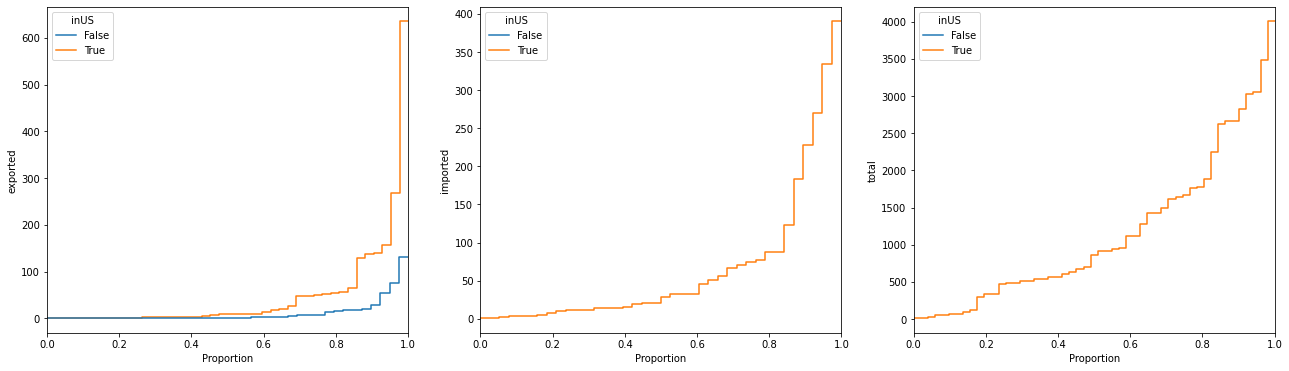

In [45]:
#plot the distribution of imported, exported, and total in USA and not in USA groups:
fig, axs = plt.subplots(1,3,figsize=(22,6))
sns.ecdfplot(data = info_loc, y='exported', hue = 'inUS', ax=axs[0])
sns.ecdfplot(data = info_loc, y='imported', hue = 'inUS', ax=axs[1])
sns.ecdfplot(data = info_loc, y='total', hue = 'inUS', ax=axs[2])

The imported and total number of dogs in USA is available, but there is no data for shelters outside of US. It seems like most of the missing data are in the shelters outside of US. Check this in the following code:

In [46]:
#Check number of NaN case in imported and total:
print('Number of NaN values for imported dog in US:',info_loc[info_loc['inUS'] ==False]['imported'].isna().sum())
print('Number of NaN values for all dogs in US:',info_loc[info_loc['inUS'] ==False]['total'].isna().sum())

#Filter the data for inUS:
info_US = info_loc[info_loc['inUS'] ==True]
print('\n Total number of missing data in each feature in US:\n',info_US.isna().sum())

#Check all the location of info_US dataset
print('\nSize of the new dataset:', info_US.shape,'\n')
info_US['location'].value_counts()

Number of NaN values for imported dog in US: 39
Number of NaN values for all dogs in US: 39

 Total number of missing data in each feature in US:
 index        0
location     0
exported     9
imported    13
total        0
inUS         0
dtype: int64

Size of the new dataset: (51, 6) 



Texas             1
Maine             1
Idaho             1
Kansas            1
Wisconsin         1
Colorado          1
Hawaii            1
Iowa              1
Massachusetts     1
North Dakota      1
South Dakota      1
Washington        1
Nevada            1
Utah              1
Oregon            1
Wyoming           1
Rhode Island      1
Minnesota         1
Vermont           1
New Hampshire     1
Delaware          1
Michigan          1
Washington DC     1
Montana           1
Connecticut       1
Nebraska          1
Alabama           1
Arkansas          1
North Carolina    1
South Carolina    1
Georgia           1
California        1
Tennessee         1
Kentucky          1
Mississippi       1
Louisiana         1
West Virginia     1
Florida           1
New Mexico        1
Maryland          1
Virginia          1
New York          1
Arizona           1
Indiana           1
Missouri          1
Ohio              1
Oklahoma          1
Pennsylvania      1
New Jersey        1
Illinois          1


In [47]:
#Fill missing data with 0, assuming that there is no import cases or export cases 
info_US.fillna(0,inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


Text(0.5, 0.98, 'The distribution dogs in shelter per states in USA')

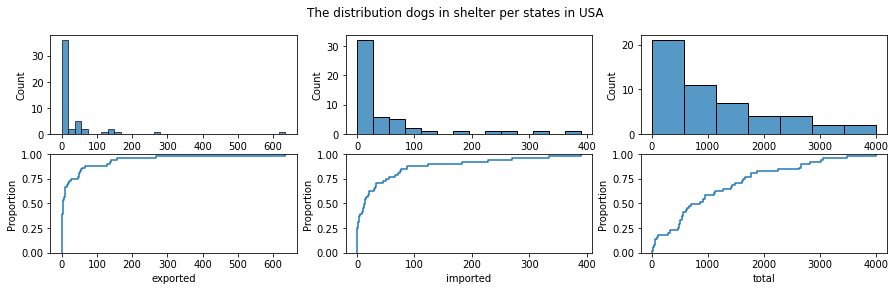

In [48]:
#plot the distribution of imported, exported, and total dogs per states in USA:
fig, axs = plt.subplots(2,3,figsize=(15,4))
sns.histplot(data = info_US, x='exported', ax=axs[0,0],label='test')
sns.histplot(data = info_US, x='imported', ax=axs[0,1])
sns.histplot(data = info_US, x='total', ax=axs[0,2])

sns.ecdfplot(data = info_US, x='exported', ax=axs[1,0])
sns.ecdfplot(data = info_US, x='imported', ax=axs[1,1])
sns.ecdfplot(data = info_US, x='total', ax=axs[1,2])

fig.suptitle('The distribution dogs in shelter per states in USA') # or plt.suptitle('Main title')

#print('Total number of missing data in each feature:\n',info_US.isna().sum())


In [49]:
print(info_US[info_US.location=='California'])
print(info_US[info_US.location=='Texas'])

   index    location  exported  imported   total  inUS
6      6  California     130.0       3.0  1664.0  True
   index location  exported  imported  total  inUS
0      0    Texas     635.0       0.0  566.0  True


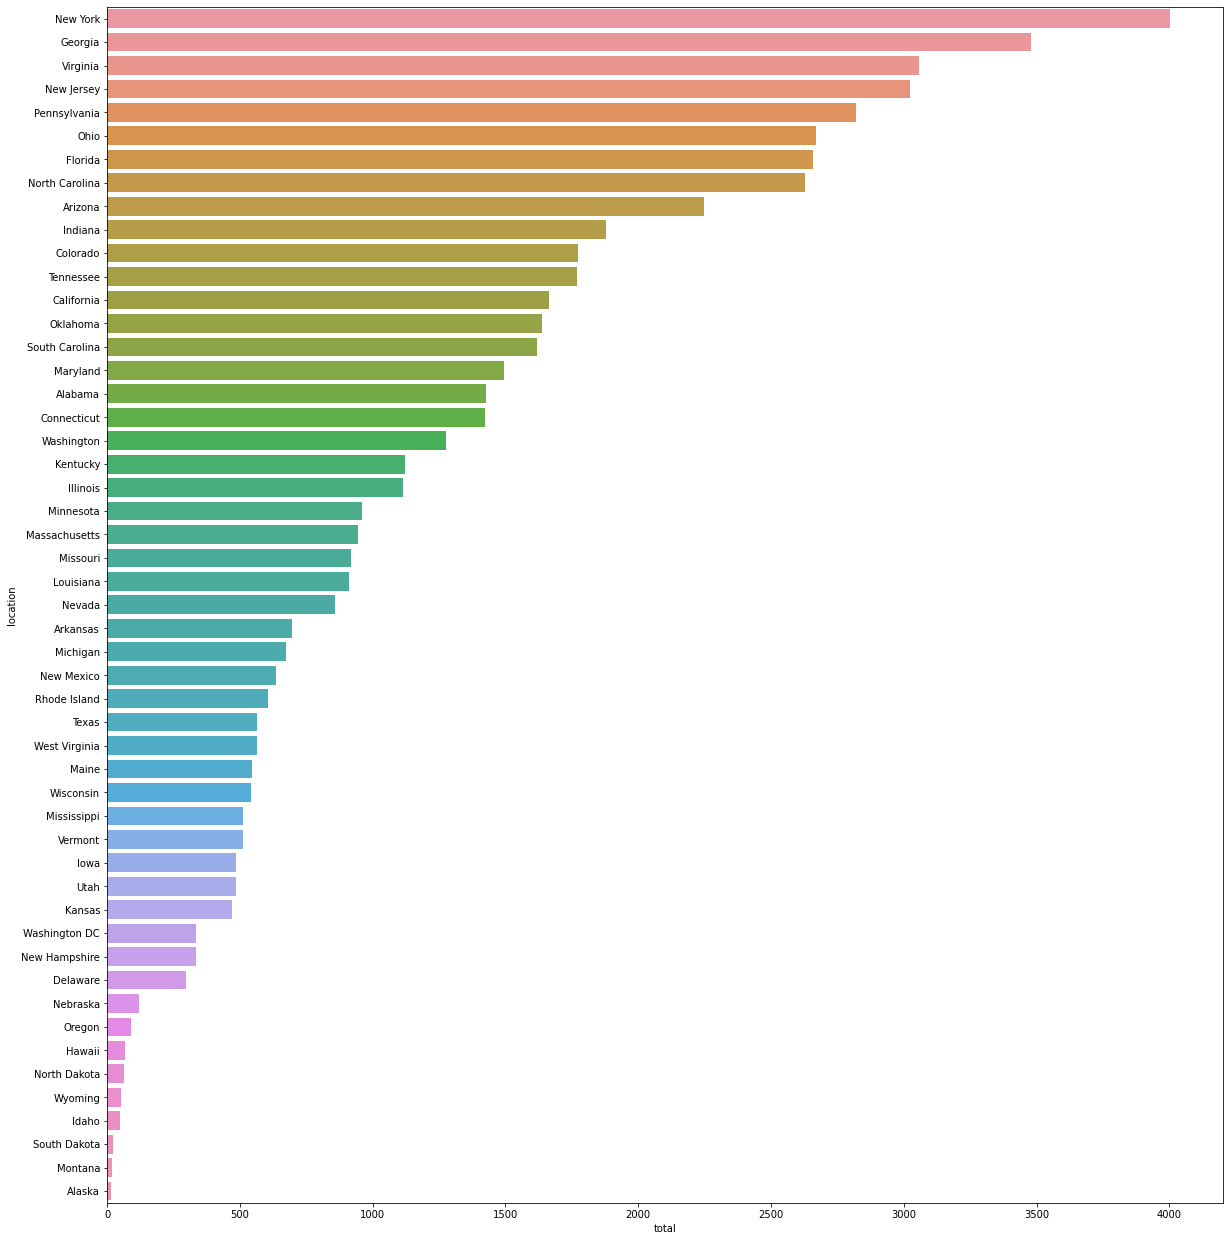

In [64]:
plt.figure(figsize=(20,22))
sns.barplot(data=info_US.sort_values(by='total', axis=0,ascending=False),
            x="total", y="location")

In [50]:
#Find states with largest and smallest number of total of dog
top_bottom_states = info_US.sort_values('total').iloc[[-1,-2,-3,2,1,0],:]
top_bottom_states['Percent']= round(top_bottom_states.iloc[:,4]/info_US['total'].sum()*100,2)
top_bottom_states

,index,location,exported,imported,total,inUS,Percent
22,22,New York,17.0,390.0,4002.0,True,6.88
4,4,Georgia,137.0,19.0,3479.0,True,5.98
19,19,Virginia,20.0,183.0,3058.0,True,5.26
55,55,South Dakota,2.0,0.0,24.0,True,0.04
88,88,Montana,0.0,0.0,18.0,True,0.03
89,89,Alaska,0.0,0.0,15.0,True,0.03


- Around 80% of all states in US will have the  2000 dogs with 100 imported dogs and 50 exported dogs per state.

- Shelters from a few states will have more dogs and contribute the total of 20% number of dogs in US. Those states are:
New York, Georgia, Virginia
- Although California and Texas are the biggest population, the amount of dogs in the shelters are very low. 


## Number of dogs in shelter vs the population in each state 



Data source for population:  https://www.census.gov/newsroom/press-kits/2019/national-state-estimates.html

In [65]:
#import the data for state population 
state_population = pd.read_csv('StatePopulation2019.csv')
state_population.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [66]:
state_symbol = pd.read_csv('state_symbol.csv')

In [67]:
print(state_population.columns)
print(list(state_symbol.columns))

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'NAME', 'CENSUS2010POP',
       'ESTIMATESBASE2010', 'POPESTIMATE2010', 'POPESTIMATE2011',
       'POPESTIMATE2012',
       ...
       'RDOMESTICMIG2019', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015', 'RNETMIG2016', 'RNETMIG2017',
       'RNETMIG2018', 'RNETMIG2019'],
      dtype='object', length=151)
['State', 'symbol']


In [68]:
#Get NAME, and popestimate2019
state_population = state_population.loc[:,['NAME','POPESTIMATE2019']]
state_population.NAME.unique()

array(['United States', 'Northeast Region', 'Midwest Region',
       'South Region', 'West Region', 'Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [69]:
#Join with the info_US dog shelter data
dog_state=info_US.merge(state_population,how='inner',left_on='location',right_on='NAME')
print(dog_state.shape, state_population.shape,info_US.shape, dog_state.columns)

(50, 8) (57, 2) (51, 6) Index(['index', 'location', 'exported', 'imported', 'total', 'inUS', 'NAME',
       'POPESTIMATE2019'],
      dtype='object')


In [70]:
dog_state.head()

,index,location,exported,imported,total,inUS,NAME,POPESTIMATE2019
0,0,Texas,635.0,0.0,566.0,True,Texas,28995881
1,1,Alabama,268.0,2.0,1428.0,True,Alabama,4903185
2,2,North Carolina,158.0,14.0,2627.0,True,North Carolina,10488084
3,3,South Carolina,139.0,12.0,1618.0,True,South Carolina,5148714
4,4,Georgia,137.0,19.0,3479.0,True,Georgia,10617423


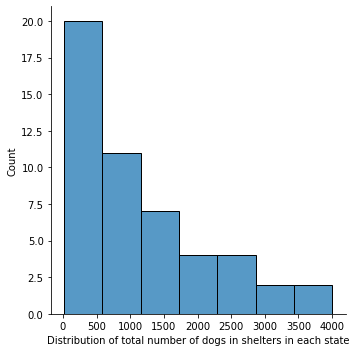

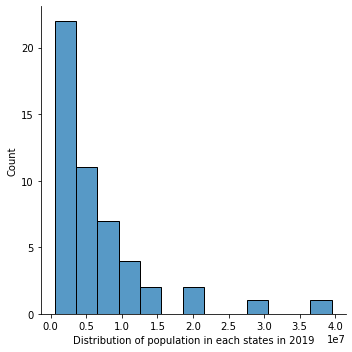

In [73]:

ax1= sns.displot(data = dog_state,x='total')
ax1.set(xlabel='Distribution of total number of dogs in shelters in each state')
ax2= sns.displot(data = dog_state,x='POPESTIMATE2019')
ax2.set(xlabel='Distribution of population in each states in 2019')

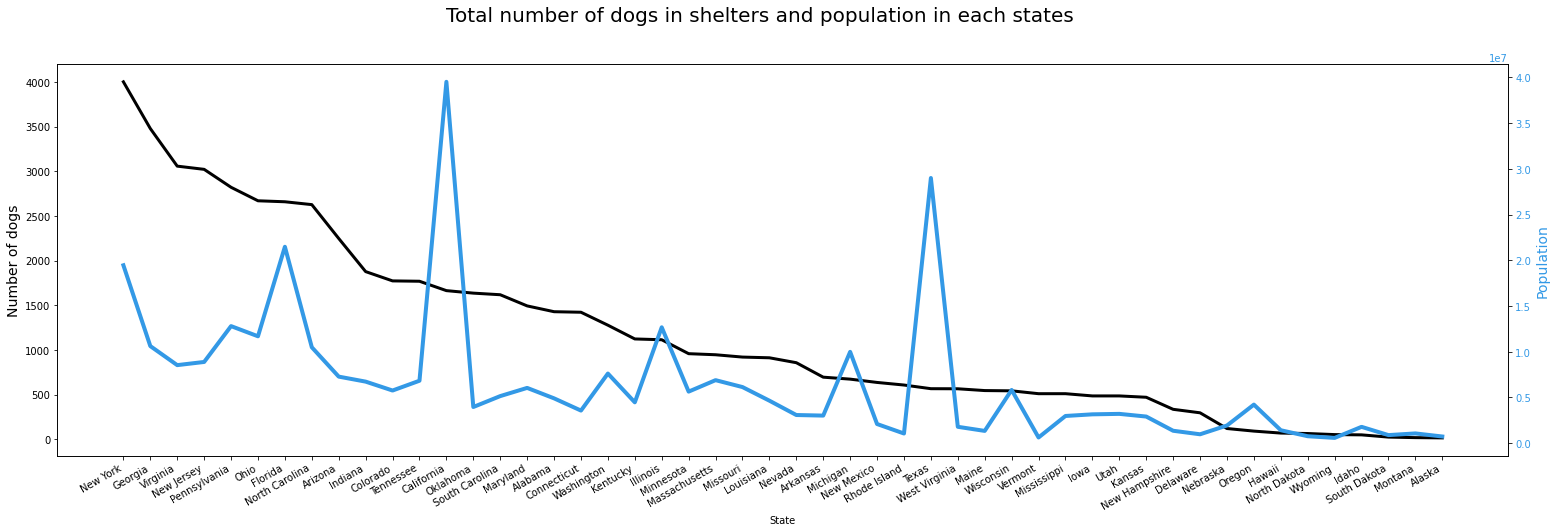

In [78]:
COLOR_dogtotal = "#000000"
COLOR_population = "#3399e6"
dog_state.sort_values(by='total',axis=0, ascending = False,inplace=True)
fig, ax1 = plt.subplots(figsize=(26, 8))
ax2 = ax1.twinx()

ax1.plot(dog_state['location'],dog_state['total'], color=COLOR_dogtotal, lw=3)
ax2.plot(dog_state['location'],dog_state['POPESTIMATE2019'], color=COLOR_population, lw=4)

ax1.set_xlabel("State")
ax1.set_ylabel("Number of dogs", color=COLOR_dogtotal, fontsize=14)
ax1.tick_params(axis="y", labelcolor=COLOR_dogtotal)

ax2.set_ylabel("Population", color=COLOR_population, fontsize=14)
ax2.tick_params(axis="y", labelcolor=COLOR_population)

fig.suptitle("Total number of dogs in shelters and population in each states", fontsize=20)
fig.autofmt_xdate()

In [75]:
#Calculate the covariance between the total number of dog and the population in each states
from scipy.stats import pearsonr
from scipy.stats import spearmanr
covariance = np.cov(dog_state.total,dog_state.POPESTIMATE2019)
corr_pearson, _ = pearsonr(dog_state.total,dog_state.POPESTIMATE2019)
corr_spearman, _ = spearmanr(dog_state.total,dog_state.POPESTIMATE2019)
print('Covariance:\n',covariance,'\n') #assume gaussian distribution
print('Pearson correlation:\n',corr_pearson,'\n') #assume gaussian distribtuion
print('Spearmans correlation:\n',corr_spearman) #monotonic relationship, not assume gaussian-like distribution

Covariance:
 [[1.03685948e+06 3.82540291e+09]
 [3.82540291e+09 5.46014863e+13]] 

Pearson correlation:
 0.5084110728067126 

Spearmans correlation:
 0.8127641192621534


The distribution is not gaussian and thus, the spearmans correlations will be more suitable. The calculated value shows possitive correlation between number of dogs in shelter and the population in each states 

## Characteristics of dogs in shelters across USA

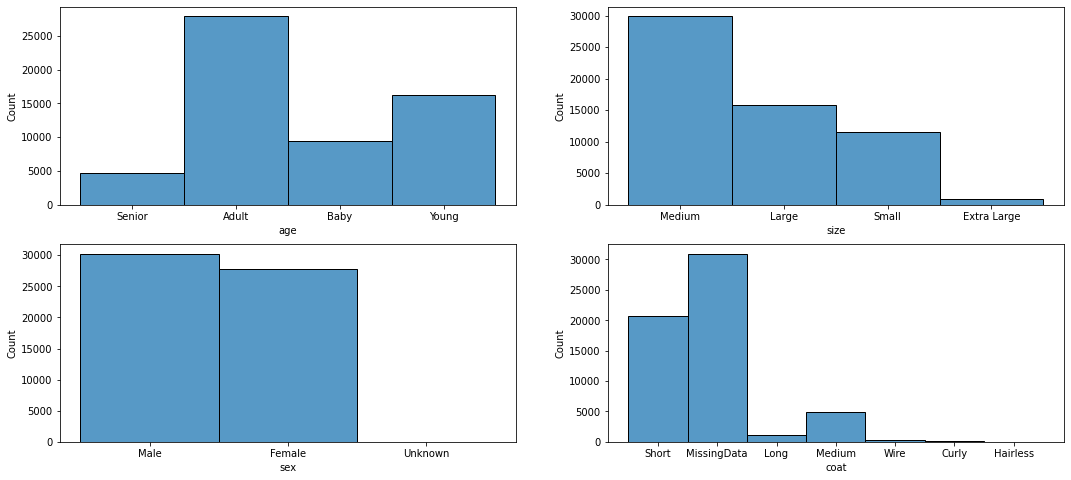

In [89]:
#Type of dogs in the shelters:
alldogs_US=alldogs[alldogs.contact_country=='US']
alldogs_US= alldogs_US.fillna('MissingData')
fig, axs = plt.subplots(2,2,figsize=(18,8))
sns.histplot(data = alldogs_US, x='age', ax=axs[0,0])
sns.histplot(data = alldogs_US, x='size', ax=axs[0,1])
sns.histplot(data = alldogs_US, x='sex', ax=axs[1,0])
sns.histplot(data = alldogs_US, x='coat', ax=axs[1,1])


In [90]:
#print(alldogs.columns)
print('children friendly dog:\n',alldogs.env_children.value_counts())
print(alldogs.contact_state.value_counts()[0:5])


children friendly dog:
 True     23588
False     4439
Name: env_children, dtype: int64
NY    4002
GA    3479
VA    3058
NJ    3022
PA    2821
Name: contact_state, dtype: int64


Following is the characteristics of the dogs in shelters:
1. Age: majority is adult and yong dogs. For senior: the dog could be removed/euthernize after several years in shelters, and people typically won't give up the old dog after long time of nurturing. 
2. Size: Typically the medium and large size dog will end up in the local shelters, which could perhaps due to the general perception of agressiveness. 
3. Sex: not much different between male and female dog. all genders seem to equally represent in the dataset
4. Coat: Althgouh the data of this feature is not completed with about 30000 missing records, but we still have some trend in which the short hair dogs are the common feature across dogs in the shelters
5. special_needs: most of dogs don't need any special care
6. States that have most dogs in shelters: New York, Georgia, Virginia, New Jersey
7. Children friendly dog: majority of dog is children friendly

The size and the coat features could also a variable show the trend from the type of breeds.

## Common breeds in shelters

Total number of mixed breed (val = True) and pure breed (val = False):
 breed_mixed
False    16589
True     41591
Name: id, dtype: int64


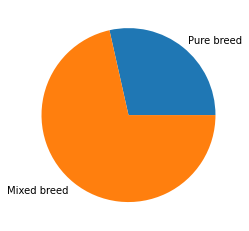

In [91]:
from pandas._libs.tslibs.vectorized import is_date_array_normalized
#number types and breed of dog that brought into shelters:
is_mixed_breed = alldogs.groupby('breed_mixed')['id'].count()
print('Total number of mixed breed (val = True) and pure breed (val = False):\n'
      ,is_mixed_breed)
plt.pie(is_mixed_breed, labels =['Pure breed','Mixed breed'])
plt.show()
#breed_type=pd.DataFrame(alldogs.iloc[:,[6]].value_counts(),columns=['total']).reset_index().sort_values('total',ascending = False)
#breed_type.tail()

Majority of dogs in shelter are mixed breed. The pure breed is about one fifth of the total population

In [92]:
#top 10 number of dog ends up in the shelters:
breeds = alldogs.groupby('breed_primary')['id'].count().sort_values(ascending = False)
print('Total number of different breeds:\n',breeds.shape[0])
breeds = pd.DataFrame(breeds)
breeds['percent']=round(breeds['id']/breeds['id'].sum()*100,2)
breeds.reset_index(inplace=True)
#Visualize the type of breeds in all location USA
print('Top 20 breeds in shelters across US:')
import plotly.express as px
fig = px.funnel(breeds[0:20], y='breed_primary', x='id')
fig.show()


Total number of different breeds:
 216
Top 20 breeds in shelters across US:


In [93]:
#Visualize the type of breeds in all location USA
print('Bottom 100 breeds in shelters across US:')
fig = px.funnel(breeds[-100:], y='breed_primary', x='id')
fig.show()

Bottom 100 breeds in shelters across US:


In [94]:
bottom10=breeds.iloc[-10:-1]
top10=breeds.iloc[0:10]
print('Top 10 breeds in the shelters:\n', list(top10['breed_primary']))
print('\nBottom 10 breeds in the shelters:\n', list(bottom10['breed_primary']))


Top 10 breeds in the shelters:
 ['Pit Bull Terrier', 'Labrador Retriever', 'Chihuahua', 'Mixed Breed', 'Terrier', 'Hound', 'German Shepherd Dog', 'Boxer', 'Shepherd', 'American Staffordshire Terrier']

Bottom 10 breeds in the shelters:
 ['Skye Terrier', 'Fila Brasileiro', 'Bolognese', 'Old English Sheepdog', 'Belgian Shepherd / Laekenois', 'Field Spaniel', 'Boykin Spaniel', 'Spinone Italiano', 'Tosa Inu']


In [95]:
top10_info = top10.merge(alldogs, how = 'left', left_on='breed_primary',right_on='breed_primary')
top10_info.breed_primary.value_counts()

Pit Bull Terrier                  7890
Labrador Retriever                7198
Chihuahua                         3766
Mixed Breed                       3242
Terrier                           2641
Hound                             2282
German Shepherd Dog               2122
Boxer                             2050
Shepherd                          1972
American Staffordshire Terrier    1862
Name: breed_primary, dtype: int64

1. Top breed of dogs are Pit Bull Terrier, Labdrador Retriever. Those are one of the most feared dogs that typically used as guard dogs due to their aggressive physics and characteristics (e.g., Pit Bull Terrier has a jaw with locking mechanism). Thus, they also tend to end up in the adoption shelters more often
2. Although the chihuahua are small dogs, the its high population in the shelters could be due to the overbreeding problems due to its popularity as well as its characateristics as an agressive dogs in some cases. [Click here for more information](https://rescuedoghome.com/why-are-there-so-many-pit-bulls-and-chihuahuas-in-shelters/#Chihuahuas_in_Shelters)


